In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

from meta.custom_env import CustomEnv
from utils.fetch_data import Api, fetch_data

data = fetch_data(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01')

env = CustomEnv(data, action_space=3, observation_space=5)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


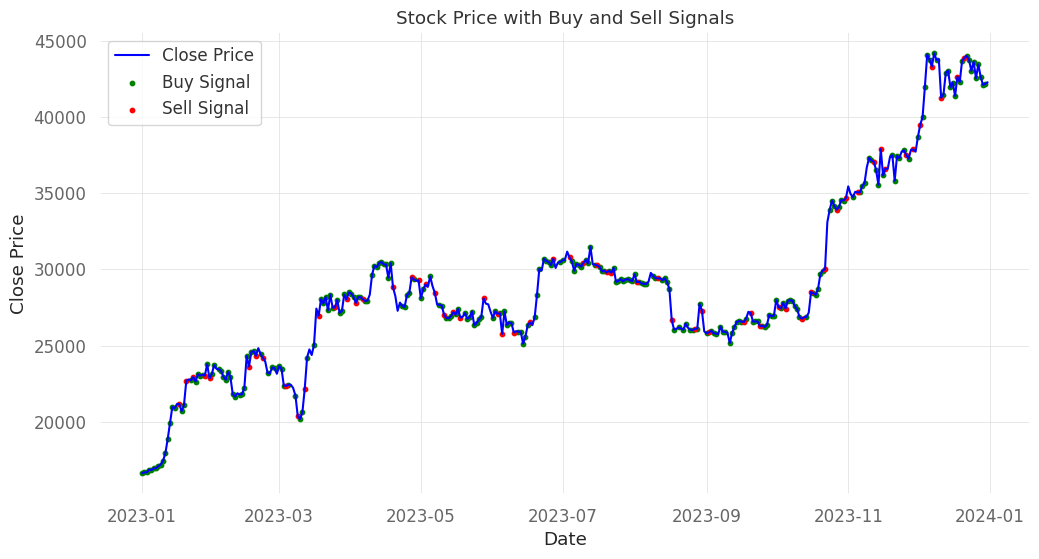

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2023-12-30
Risk-Free Rate      0.0%
Time in Market      76.0%

Cumulative Return   30.31%
CAGR﹪              20.18%

Sharpe              1.57
Prob. Sharpe Ratio  98.32%
Sortino             2.97
Sortino/√2          2.1
Omega               1.55

Max Drawdown        -5.82%
Longest DD Days     125

Gain/Pain Ratio     0.55
Gain/Pain (1M)      5.63

Payoff Ratio        1.57
Profit Factor       1.55
Common Sense Ratio  2.17
CPC Index           1.21
Tail Ratio          1.4
Outlier Win Ratio   8.61
Outlier Loss Ratio  5.64

MTD                 -0.44%
3M                  3.99%
6M                  2.69%
YTD                 30.31%
1Y                  30.31%
3Y (ann.)           20.18%
5Y (ann.)           20.18%
10Y (ann.)          20.18%
All-time (ann.)     20.18%

Avg. Drawdown       -1.42%
Avg. Drawdown Days  21
Recovery Factor     4.73
Ulcer Index         0.02
Serenity Index      1.99


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


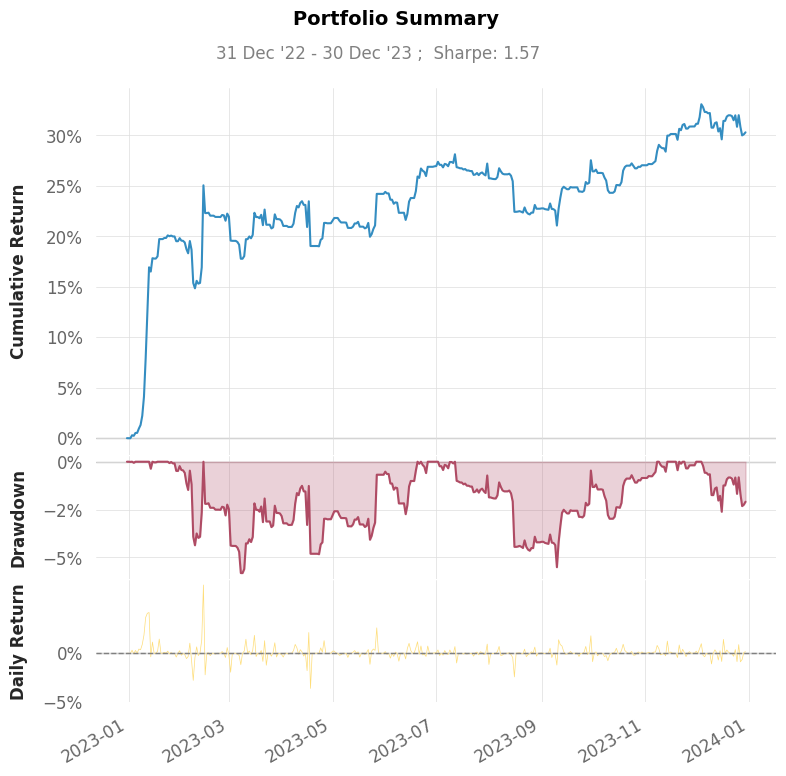

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


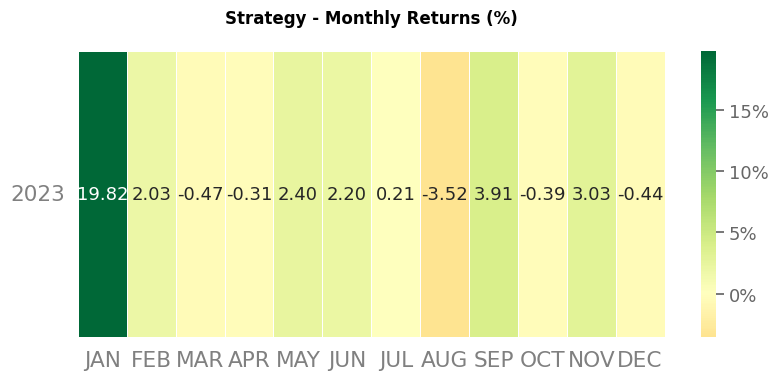

In [2]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-01-01')

test_env = CustomEnv(test_data, action_space=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)